# Verbindung zur SQLite DB aufbauen

In [2]:
import sqlite3
db = sqlite3.connect("Data/tuweather.db")
result = db.execute("select * from weather limit 5");
for row in result:
    print(row)
 

(16, 29.25, 'Rain', 23.33, 23.15, 21.06, 24.93, 1002, 55, 0.89, 113, 2.68, 40, 1628308265, 1628362957, '2021-08-07 14:50:04', 0.37)
(17, 29.375, 'Clouds', 23.21, 23.13, 21.06, 25.49, 1002, 59, 4.12, 190, 9.26, 40, 1628308265, 1628362957, '2021-08-07 15:00:04', 0.0)
(18, 29.75, 'Clouds', 23.36, 23.27, 21.06, 25.57, 1001, 58, 5.14, 210, 0.0, 40, 1628308265, 1628362957, '2021-08-07 15:10:04', 0.0)
(19, 29.687, 'Clouds', 23.36, 23.27, 21.06, 25.57, 1001, 58, 5.14, 210, 0.0, 40, 1628308265, 1628362957, '2021-08-07 15:20:04', 0.0)
(20, 29.625, 'Clouds', 23.74, 23.61, 21.98, 24.96, 1001, 55, 0.89, 113, 2.24, 40, 1628308265, 1628362957, '2021-08-07 15:30:04', 0.0)


## Temperaturverlauf vom 1. Juni 2022 bis 5. Juni 2022

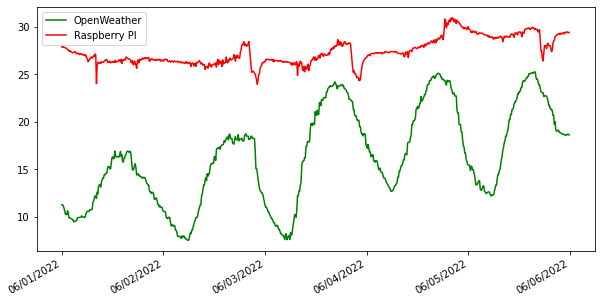

In [21]:
import matplotlib.pyplot as plt;
import datetime as dt
import matplotlib.dates as mdates

result = db.execute('select * from weather where Timestamp between "2022-06-01 00:00:00" and "2022-06-05 23:59:59"');

temp=list()
pitemp=list()
dat=list()
for row in result:
    temp.append(row[3])
    pitemp.append(row[1])
    dat.append(row[15])

x = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in dat]


fig,ax = plt.subplots()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x,temp,"g",label="OpenWeather")
ax.plot(x,pitemp,"r",label="Raspberry PI")
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()


